In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
from matplotlib.ticker import FuncFormatter

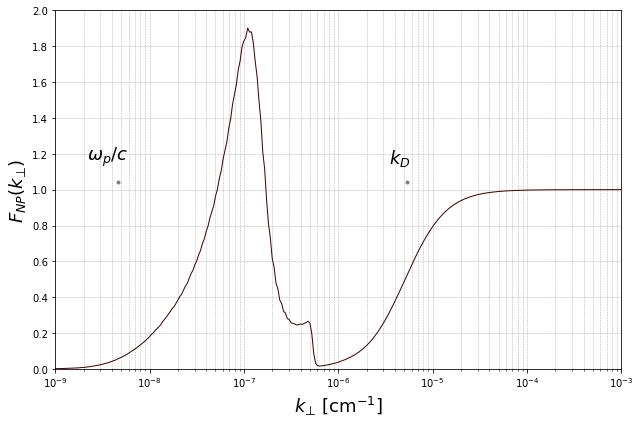

In [7]:
data = np.loadtxt('fnpk_z2.dat')
x_data = data[:, 0]
y_data = data[:, 1]

additional_points = np.array([
    [4.60179957559806e-09, 1.04],
    [5.385257015560704e-06, 1.04]
])
x_points = additional_points[:, 0]
y_points = additional_points[:, 1]


fig, ax = plt.subplots(figsize=(9, 6))

ax.plot(
    x_data, y_data,
    linestyle='-',
    linewidth=1,
    color="#400000",
    label='_nolegend_'
)

ax.plot(
    x_points, y_points,
    linestyle='None',
    marker='o',
    markersize=3,
    markerfacecolor="#808080",
    markeredgecolor="#808080",
    label='_nolegend_'
)

ax.set_xscale('log')
ax.set_xlim(1e-9, 1e-3)
ax.set_ylim(0, 2)

ax.set_yticks(np.arange(0, 2.01, 0.2))

def log_tick_formatter(val, pos):
    exponent = int(np.log10(val))
    return r'$10^{%d}$' % exponent

ax.xaxis.set_major_formatter(FuncFormatter(log_tick_formatter))

ax.set_xlabel(r'$k_{\bot}$ [cm$^{-1}$]', fontsize=18)
ax.set_ylabel(r'$F_{NP}(k_{\bot})$', fontsize=18)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# k_D
ax.text(
    4.5e-6, 1.12,
    r'$k_D$',
    fontsize=18,
    ha='center',
    va='bottom'
)

# ω_p/c
ax.text(
    3.6e-9, 1.12,
    r'$\omega_p / c$',
    fontsize=18,
    ha='center',
    va='bottom'
)

plt.tight_layout()

#plt.savefig('fnpk_z2.eps', format='eps')
plt.show()


/var/folders/k2/qxng019s7y17hp_kgkzy9b180000gn/T/ipykernel_41415/3295987611.py:11: RuntimeWarning: divide by zero encountered in log10
  y_values_1 = np.log10(data[:, 0]**3 * data[:, 3] * 4 * pi * np.log(10))
/var/folders/k2/qxng019s7y17hp_kgkzy9b180000gn/T/ipykernel_41415/3295987611.py:12: RuntimeWarning: divide by zero encountered in log10
  y_values_2 = np.log10(data[:, 0]**3 * data[:, 5] * 4 * pi * np.log(10))
/var/folders/k2/qxng019s7y17hp_kgkzy9b180000gn/T/ipykernel_41415/3295987611.py:13: RuntimeWarning: divide by zero encountered in log10
  y_values_3 = np.log10(data[:, 0]**3 * data[:, 4] * 4 * pi * np.log(10))
/var/folders/k2/qxng019s7y17hp_kgkzy9b180000gn/T/ipykernel_41415/3295987611.py:14: RuntimeWarning: divide by zero encountered in log10
  y_values_4 = np.log10(data[:, 0]**3 * data[:, 2] * 4 * pi * np.log(10))
/var/folders/k2/qxng019s7y17hp_kgkzy9b180000gn/T/ipykernel_41415/3295987611.py:39: RuntimeWarning: divide by zero encountered in log10
  y_values_energy_1 = np.log1

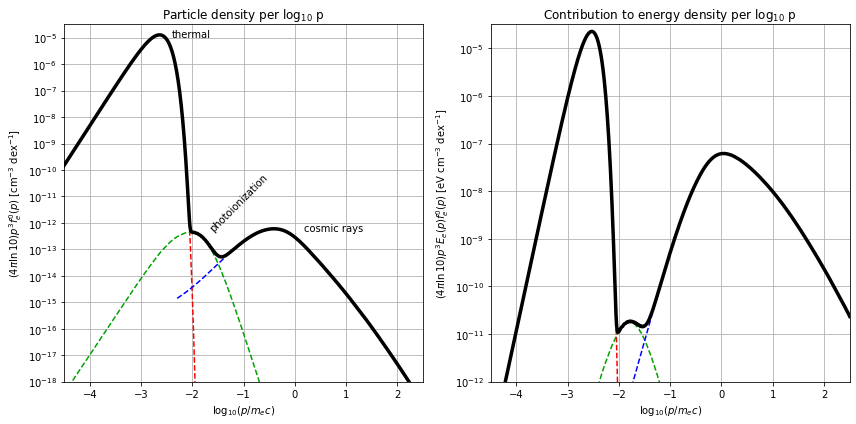

In [8]:
# Load data from the file
data = np.loadtxt("phasespace_e_z2.dat")

# Constants
p0 = 9.11e-28 * 2.998e10
pcrmin = 1.349772990521278e-19
pi = np.pi

# Prepare data for plotting
x_values = np.log10(data[:, 0] / p0)
y_values_1 = np.log10(data[:, 0]**3 * data[:, 3] * 4 * pi * np.log(10))
y_values_2 = np.log10(data[:, 0]**3 * data[:, 5] * 4 * pi * np.log(10))
y_values_3 = np.log10(data[:, 0]**3 * data[:, 4] * 4 * pi * np.log(10))
y_values_4 = np.log10(data[:, 0]**3 * data[:, 2] * 4 * pi * np.log(10))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First subplot - Particle density per log10(p)
axs[0].plot(x_values, y_values_1, label="Line Style 2", color="#ff0000", linestyle='--', linewidth=1.5)
axs[0].plot(x_values, y_values_2, label="Line Style 3", color="#00a000", linestyle='--', linewidth=1.5)
axs[0].plot(x_values[data[:, 0] > pcrmin], y_values_3[data[:, 0] > pcrmin], label="Line Style 4", color="#0000ff", linestyle='--', linewidth=1.5)
axs[0].plot(x_values, y_values_4, label="Line Style 1", color="#000000", linestyle='-', linewidth=3.5)

# First subplot settings
axs[0].set_xlabel(r"$\log_{10} (p/m_ec)$")
axs[0].set_ylabel(r"$(4\pi \ln 10)p^3f^0_e(p)$ [cm$^{-3}$ dex$^{-1}$]")
axs[0].set_title("Particle density per log$_{10}$ p")
axs[0].set_xlim(-4.5, 2.5)
axs[0].set_ylim(-18, -4.5)
axs[0].grid(True)
axs[0].set_yticks(np.arange(-18, -4.5, 1))
axs[0].set_yticklabels([r"$10^{" + str(int(i)) + "}$" for i in np.arange(-18, -4, 1)])
axs[0].text(-2.4, -5, "thermal")
axs[0].text(-1.7, -12.3, "photoionization", rotation=45)
axs[0].text(0.18, -12.3, "cosmic rays")

# Second subplot - Contribution to energy density per log10(p)
y_values_energy_1 = np.log10(data[:, 0]**3 * data[:, 1] * data[:, 3] * 4 * pi * np.log(10))
y_values_energy_2 = np.log10(data[:, 0]**3 * data[:, 1] * data[:, 5] * 4 * pi * np.log(10))
y_values_energy_3 = np.log10(data[:, 0]**3 * data[:, 1] * data[:, 4] * 4 * pi * np.log(10))
y_values_energy_4 = np.log10(data[:, 0]**3 * data[:, 1] * data[:, 2] * 4 * pi * np.log(10))

axs[1].plot(x_values, y_values_energy_1, label="Line Style 2", color="#ff0000", linestyle='--', linewidth=1.5)
axs[1].plot(x_values, y_values_energy_2, label="Line Style 3", color="#00a000", linestyle='--', linewidth=1.5)
axs[1].plot(x_values[data[:, 0] > pcrmin], y_values_energy_3[data[:, 0] > pcrmin], label="Line Style 4", color="#0000ff", linestyle='--', linewidth=1.5)
axs[1].plot(x_values, y_values_energy_4, label="Line Style 1", color="#000000", linestyle='-', linewidth=3.5)

# Second subplot settings
axs[1].set_xlabel(r"$\log_{10} (p/m_ec)$")
axs[1].set_ylabel(r"$(4\pi \ln 10)p^3E_e(p)f^0_e(p)$ [eV cm$^{-3}$ dex$^{-1}$]")
axs[1].set_title("Contribution to energy density per log$_{10}$ p")
axs[1].set_xlim(-4.5, 2.5)
axs[1].set_ylim(-12, -4.5)
axs[1].grid(True)
axs[1].set_yticks(np.arange(-12, -4.5, 1))
axs[1].set_yticklabels([r"$10^{" + str(int(i)) + "}$" for i in np.arange(-12, -4, 1)])

# Display the plots
plt.tight_layout()
plt.show()

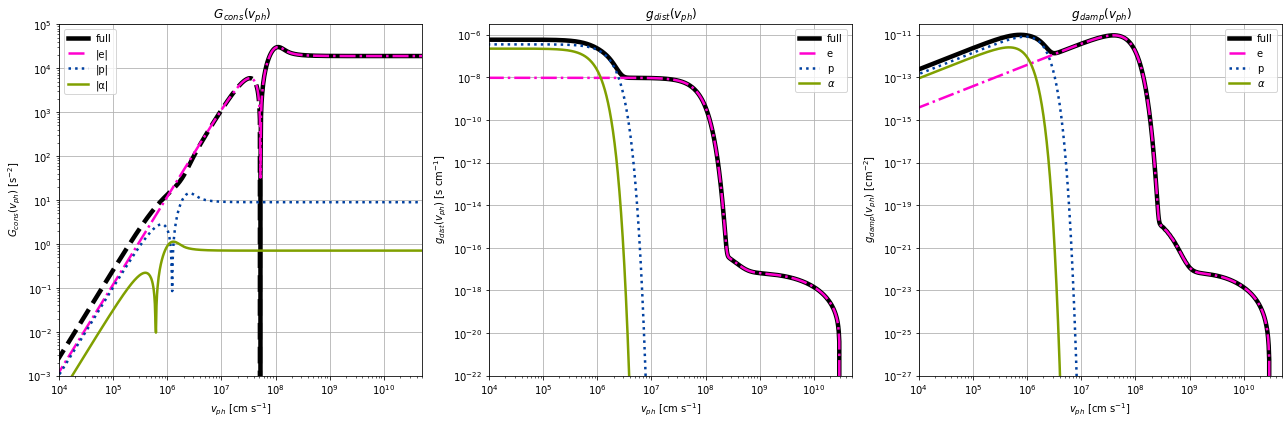

In [9]:
# Load data from the file
data = np.loadtxt("allgfunc_0_2.dat")

# Constants
c = 2.99792458e10

# Prepare data for plotting
vph = data[:, 0]
full = data[:, 4]
e_abs = np.abs(data[:, 1])
p_abs = np.abs(data[:, 2])
alpha_abs = np.abs(data[:, 3])

# Distortion data
dist_full = data[:, 8]
dist_e = np.abs(data[:, 5])
dist_p = np.abs(data[:, 6])
dist_alpha = np.abs(data[:, 7])

# Damping data
damp_full = data[:, 12]
damp_e = np.abs(data[:, 9])
damp_p = np.abs(data[:, 10])
damp_alpha = np.abs(data[:, 11])

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# First subplot - ~G_{cons}(v_{ph})
axs[0].plot(vph, full, label="full", linestyle='-', linewidth=4.5, color="#000000")
axs[0].plot(vph, -full, linestyle='--', linewidth=4.5, color="#000000")
axs[0].plot(vph, e_abs, label="|e|", linestyle='-.', linewidth=2.5, color="#ff00cf")
axs[0].plot(vph, -e_abs, linestyle='-.', linewidth=2.5, color="#ff00cf")
axs[0].plot(vph, p_abs, label="|p|", linestyle=':', linewidth=2.5, color="#0040a0")
axs[0].plot(vph, -p_abs, linestyle=':', linewidth=2.5, color="#0040a0")
axs[0].plot(vph, alpha_abs, label="|α|", linestyle='-', linewidth=2.5, color="#80a000")
axs[0].plot(vph, -alpha_abs, linestyle='-', linewidth=2.5, color="#80a000")

# First subplot settings
axs[0].set_xlabel(r"$v_{ph}$ [cm s$^{-1}$]")
axs[0].set_ylabel(r"$~G_{cons}(v_{ph})$ [s$^{-2}$]")
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlim(1e4, 5e10)
axs[0].set_ylim(1e-3, 1e5)
axs[0].grid(True)
axs[0].legend()
axs[0].set_title(r"$~G_{cons}(v_{ph})$")

# Second subplot - ~g_{dist}(v_{ph})
axs[1].plot(vph, dist_full, label="full", linestyle='-', linewidth=4.5, color="#000000")
axs[1].plot(vph, -dist_full, linestyle='--', linewidth=4.5, color="#000000")
axs[1].plot(vph, dist_e, label="e", linestyle='-.', linewidth=2.5, color="#ff00cf")
axs[1].plot(vph, -dist_e, linestyle='-.', linewidth=2.5, color="#ff00cf")
axs[1].plot(vph, dist_p, label="p", linestyle=':', linewidth=2.5, color="#0040a0")
axs[1].plot(vph, -dist_p, linestyle=':', linewidth=2.5, color="#0040a0")
axs[1].plot(vph, dist_alpha, label=r"$\alpha$", linestyle='-', linewidth=2.5, color="#80a000")
axs[1].plot(vph, -dist_alpha, linestyle='-', linewidth=2.5, color="#80a000")

# Second subplot settings
axs[1].set_xlabel(r"$v_{ph}$ [cm s$^{-1}$]")
axs[1].set_ylabel(r"$~g_{dist}(v_{ph})$ [s cm$^{-1}$]")
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlim(1e4, 5e10)
axs[1].set_ylim(1e-22, 3e-6)
axs[1].grid(True)
axs[1].legend()
axs[1].set_title(r"$~g_{dist}(v_{ph})$")

# Third subplot - ~g_{damp}(v_{ph})
axs[2].plot(vph, damp_full, label="full", linestyle='-', linewidth=4.5, color="#000000")
axs[2].plot(vph, -damp_full, linestyle='--', linewidth=4.5, color="#000000")
axs[2].plot(vph, damp_e, label="e", linestyle='-.', linewidth=2.5, color="#ff00cf")
axs[2].plot(vph, -damp_e, linestyle='-.', linewidth=2.5, color="#ff00cf")
axs[2].plot(vph, damp_p, label="p", linestyle=':', linewidth=2.5, color="#0040a0")
axs[2].plot(vph, -damp_p, linestyle=':', linewidth=2.5, color="#0040a0")
axs[2].plot(vph, damp_alpha, label=r"$\alpha$", linestyle='-', linewidth=2.5, color="#80a000")
axs[2].plot(vph, -damp_alpha, linestyle='-', linewidth=2.5, color="#80a000")

# Third subplot settings
axs[2].set_xlabel(r"$v_{ph}$ [cm s$^{-1}$]")
axs[2].set_ylabel(r"$~g_{damp}(v_{ph})$ [cm$^{-2}$]")
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_xlim(1e4, 5e10)
axs[2].set_ylim(1e-27, 3e-11)
axs[2].grid(True)
axs[2].legend()
axs[2].set_title(r"$~g_{damp}(v_{ph})$")

# Display the plots
plt.tight_layout()
plt.show()

In [39]:
with open('rate_z2.0_10Mpc.pkl', 'rb') as f:
    rate_arr = pkl.load(f)

In [40]:
parsec_to_cm=3.085677581e18
rate_arr = np.array(rata_arr)
rate_arr = rate_arr.reshape(400,400)#*(parsec_to_cm*1.e6)**2

In [41]:
print(rate_arr.shape)
print(rate_arr)

(400, 400)
[[4.56193675e-40 4.56193675e-40 4.56193675e-40 ... 4.97682095e-54
  3.66615231e-54 2.70192592e-54]
 [5.02204616e-40 5.02204616e-40 5.02204616e-40 ... 4.43396080e-54
  3.26679205e-54 2.40843266e-54]
 [5.53231349e-40 5.53231349e-40 5.53231349e-40 ... 3.95193960e-54
  2.91162779e-54 2.14668763e-54]
 ...
 [3.66434433e-38 2.89022687e-38 2.29808548e-38 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.12138510e-39 5.95278301e-39 4.97995966e-39 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [           nan            nan            nan ...            nan
             nan            nan]]


In [42]:
eV_to_erg = 1.6022e-12
def plot_rate(E_e):
    E_e_arr = gamma_e_arr*c**2/eV_to_erg
    i = np.argmin(np.abs(E_e_arr - E_e))
    
    plt.plot(theta_e_arr, rate_arr[i], label=r'$E_e$=%.2e eV' % E_e)

In [43]:
m_e = 9.10938e-28 # electron mass in gram
c = 2.998e10 # speed of light in cm/s
gamma_e_arr = np.logspace(8, 14, 400) * eV_to_erg / m_e / c**2 # lab-frame Lorentz factor of the electron produced
theta_e_arr = np.logspace(-8, 0, 400)

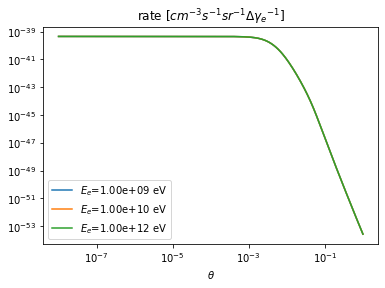

In [44]:
plot_rate(1.e9)
plot_rate(1.e10)
plot_rate(1.e12)

plt.legend()
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1.e-8,1.e-5)
plt.title(r'rate $[{cm}^{-3}s^{-1}{sr}^{-1}{\Delta\gamma_e}^{-1}]$')
plt.xlabel(r'$\theta$')
plt.show()